# Lab 6

This lab will focus on relational data and touch on some text analysis to be covered.

## Table of Contents
* [Review](#Review)
* [Explore](#Explore)
* [Exercises](#Exercises)

In [38]:
library(tidyverse)
library(nycflights13)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 2.2.1     ✔ purrr   0.2.4
✔ tibble  1.4.1     ✔ dplyr   0.7.4
✔ tidyr   0.7.2     ✔ stringr 1.2.0
✔ readr   1.1.1     ✔ forcats 0.2.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


## Review

### The Exam

Let's chat! How did you think it went? Any problems you want me to go over? Any surprises/suggestions?

### Relational Data

Relational data is simple data that is split up into different tables, but organized in a way that different tables can be joined when they are needed. They can be simple or very complex!

![Simple Star](relationalexample.jpg)
![Complex Star](complexstar.jpg)

### Keys

Keys are simply fields, or columns, in the table that contain some sort of ID that enables you to uniquely identify records in a given table and also join to other tables. There are two main types of keys:
* Primary Key: Uniquely identifies records within a single table
* Foreign Key: Uniquely identifies records in another table

### Joins

In order to join all these tables together, we have to have some way to connect two tables together. There are different ways to do this that generally fall into two categories, inner joins and outer joins. Here is a link to a visual representation of each (http://joins.spathon.com/). A description of each type of join is as follows:
* inner_join(): Only join on key matches in both tables
* left_join() (Outer Join): Keep all items from the left table, join on matches for the right
* right_join() (Outer Join): Keep all items from the right table, join on matches for the left
* full_join() (Outer Join): Keep all items from each table and just add nulls for missing keys


### Less Common Joins

There are also a couple types of joins that are much less common but still can come in handy when in the tidyverse world. They are:
* semi_join(tb1, tb2, key=col): Take all of the fields in table 1 that are also in table 2 (based on the key)
* anti_join(tb1, tb2, key=col): Take none of the fields in table 1 that are also in table 2 (based on the key)

### Some Join Examples

In [12]:
# If I want the weather data for each flight, I need to keep all flights in the flight table, 
# then attach weather data on the side
tail(left_join(flights, weather, by = c('year','month','day','hour','origin')))

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,⋯,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour.y
2013,9,30,NA,1842,NA,NA,2019,NA,EV,⋯,71.96,46.94,40.90,NA,3.45234,3.972884,0,1015.8,10,2013-09-30 13:00:00
2013,9,30,NA,1455,NA,NA,1634,NA,9E,⋯,68.00,48.92,50.44,20,5.75390,6.621473,0,1018.4,10,2013-09-30 09:00:00
2013,9,30,NA,2200,NA,NA,2312,NA,9E,⋯,66.92,51.98,58.65,160,9.20624,10.594357,0,1015.4,10,2013-09-30 17:00:00
2013,9,30,NA,1210,NA,NA,1330,NA,MQ,⋯,60.98,51.08,69.86,NA,5.75390,6.621473,0,1018.6,10,2013-09-30 07:00:00
2013,9,30,NA,1159,NA,NA,1344,NA,MQ,⋯,60.08,51.98,74.56,360,4.60312,5.297178,0,1018.5,10,2013-09-30 06:00:00
2013,9,30,NA,840,NA,NA,1020,NA,MQ,⋯,59.00,53.06,80.64,10,3.45234,3.972884,0,1017.8,10,2013-09-30 03:00:00


In [13]:
#If I want get airport data for each flight's origin, I would again need a left join to include all flights
head(left_join(flights,airports,by = c('origin'='faa')))

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,⋯,hour,minute,time_hour,name,lat,lon,alt,tz,dst,tzone
2013,1,1,517,515,2,830,819,11,UA,⋯,5,15,2013-01-01 05:00:00,Newark Liberty Intl,40.69250,-74.16867,18,-5,A,America/New_York
2013,1,1,533,529,4,850,830,20,UA,⋯,5,29,2013-01-01 05:00:00,La Guardia,40.77725,-73.87261,22,-5,A,America/New_York
2013,1,1,542,540,2,923,850,33,AA,⋯,5,40,2013-01-01 05:00:00,John F Kennedy Intl,40.63975,-73.77893,13,-5,A,America/New_York
2013,1,1,544,545,-1,1004,1022,-18,B6,⋯,5,45,2013-01-01 05:00:00,John F Kennedy Intl,40.63975,-73.77893,13,-5,A,America/New_York
2013,1,1,554,600,-6,812,837,-25,DL,⋯,6,0,2013-01-01 06:00:00,La Guardia,40.77725,-73.87261,22,-5,A,America/New_York
2013,1,1,554,558,-4,740,728,12,UA,⋯,5,58,2013-01-01 05:00:00,Newark Liberty Intl,40.69250,-74.16867,18,-5,A,America/New_York


In [29]:
# If I only wanted airports that were on the west side of the US (longitude ~ -100), I can simply use a join
flt_airports = airports %>% filter(lon < -100)
head(inner_join(flights, flt_airports, by = c('dest'='faa')))

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,⋯,hour,minute,time_hour,name,lat,lon,alt,tz,dst,tzone
2013,1,1,558,600,-2,924,917,7,UA,⋯,6,0,2013-01-01 06:00:00,Los Angeles Intl,33.94254,-118.4081,126,-8,A,America/Los_Angeles
2013,1,1,558,600,-2,923,937,-14,UA,⋯,6,0,2013-01-01 06:00:00,San Francisco Intl,37.61897,-122.3749,13,-8,A,America/Los_Angeles
2013,1,1,559,600,-1,854,902,-8,UA,⋯,6,0,2013-01-01 06:00:00,Mc Carran Intl,36.08006,-115.1522,2141,-8,A,America/Los_Angeles
2013,1,1,611,600,11,945,931,14,UA,⋯,6,0,2013-01-01 06:00:00,San Francisco Intl,37.61897,-122.3749,13,-8,A,America/Los_Angeles
2013,1,1,622,630,-8,1017,1014,3,US,⋯,6,30,2013-01-01 06:00:00,Phoenix Sky Harbor Intl,33.43428,-112.0116,1135,-7,N,America/Phoenix
2013,1,1,627,630,-3,1018,1018,0,US,⋯,6,30,2013-01-01 06:00:00,Phoenix Sky Harbor Intl,33.43428,-112.0116,1135,-7,N,America/Phoenix


### Sets

Tidyverse also provides a nice set of functions to perform set analysis on. By a set we mean like what you have learned in probability courses shown in the venn digram below. The main operations you can perform are:
* intersect(): Find elements common to both sets
* union(): Combine both sets together, but only keep one copy of each duplicate
* union_all(): Combine both sets together, regardless of the number of duplicates
* setdiff(): Find elements are the difference of two sets
* setequal(): Gives a boolean True or False if two sets are equal (e.g. same elements)

![](sets.jpg)

In [36]:
# Operations work on dataframes/tibbles/vectors
x = c(1,2,3)
y = c(4,3,1)
intersect(x,y)

[1] 1 3

In [37]:
union(x,y)

[1] 1 2 3 4

In [38]:
union_all(x,y)

[1] 1 2 3 4 3 1

In [42]:
#Setdiff is finding the elements that result from x - y
setdiff(x,y)

[1] 2

In [50]:
#setequal tells you if two sets contain the same values (regardless of duplicates)
x2 = c(1,1,2,2,3,3)
cat("First set: ",    setequal(x,y),    "\n")
cat("With new set: ", setequal(x,x2)   )

First set:  FALSE 
With new set:  TRUE

### Introduction to Stringr

Stringr is a package included in tidyverse that has multiple functions that make it easier to work with strings (e.g. 'apple', '4', 'this is a string'). These functions fall into these four main categories:
1. Character manipulation **(str_length, str_sub, str_dup)**
2. Handling whitespace **(str_pad, str_trunc, str_trim, str_wrap)**
3. Handling country-specific strings using 'locale =' **(str_to_upper, str_to_lower, str_to_title, str_order, str_sort)**
4. Pattern matching normally using regex **(str_detect, str_subset, str_count, str_locate, str_locate_all, str_extract, str_extract_all, str_match, str_match_all, str_replace, str_replace_all, str_split, str_split_fixed)**

## Explore

The following analysis is a teaser as to the type of text analysis you can do as you learn the basics of working with text in R. This code performs sentiment analysis on books in order to gauge how happy or sad the book is as it progresses. All of the analysis is using tidytext, which is the text mining equivalent to tidyverse.

**Note:** *This content uses some functions and techniques that are outside the scope of the course, it is meant to show you how what you're learning can be used in interesting problems.*

In [3]:
# Bring in tidytext package
library(tidytext)

In [55]:
# Create a function that takes a raw text book and converts it into a nice tibble for analysis
tidybook = function(txt,title) {
    raw = readLines(txt)
    book = as.tibble(raw)
    book['book'] = title
    colnames(book) = c('text','book')
    book = book %>%
          mutate(linenumber = row_number(),
                 chapter = cumsum(str_detect(text, regex("^chapter [\\divxlc]", ignore_case = TRUE)))) %>%
          unnest_tokens(word, text)
    return(book)
}

In [60]:
#Try it out on alice in wonderland
bk = tidybook('aliceinwonderland.txt', 'Alice in Wonderland')
head(bk)

book,linenumber,chapter,word
Alice in Wonderland,1,0,project
Alice in Wonderland,1,0,gutenberg’s
Alice in Wonderland,1,0,alice’s
Alice in Wonderland,1,0,adventures
Alice in Wonderland,1,0,in
Alice in Wonderland,1,0,wonderland


In [94]:
plotsentiment = function(book, linegrp =50, sent='bing') {
    #Calculate sentiment using specific lexicon (bing or nrc)
    bk_sentiment = book %>%
        inner_join(get_sentiments(sent),by = 'word') %>%
        count(book, index = linenumber %/% linegrp, sentiment) %>%
        spread(sentiment, n, fill = 0) %>%
        mutate(sentiment = positive - negative)
    #Plot results
    ggplot(bk_sentiment, aes(index, sentiment, fill = book)) +
        geom_col(show.legend = FALSE) + 
        labs(x="Line Grouping", y="Sentiment (+/-)", title=str_c( bk$book[1]," Sentiment Analysis"))
}

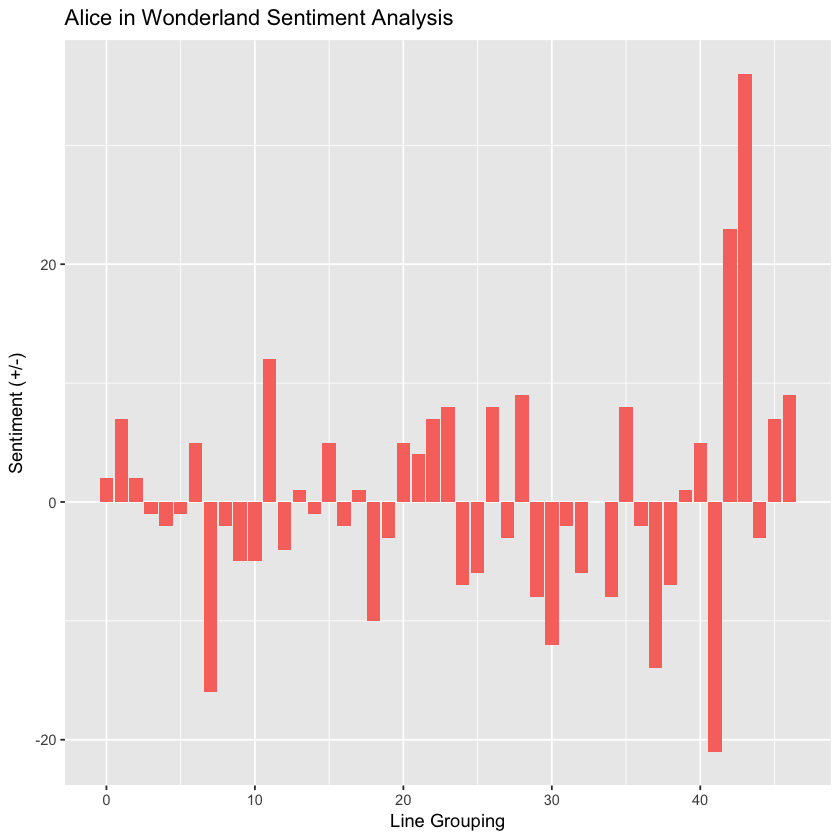

In [95]:
plotsentiment(bk,80,'bing')

## Exercises

### Section 13

In [ ]:
# Compute the average delay by destination, then join on the airports data frame so you can show the
# spatial distribution of delays. Here’s an easy way to draw a map of the United States:
airports %>%
    semi_join(flights, c("faa" = "dest")) %>%
    ggplot(aes(lon, lat)) +
    borders("state") +
    geom_point() +
    coord_quickmap()


#Solution:
avg_dest_delays <-
  flights %>%
  group_by(dest) %>%
  # arrival delay NA's are cancelled flights
  summarise(delay = mean(arr_delay, na.rm = TRUE)) %>%
  inner_join(airports, by = c(dest = "faa"))

avg_dest_delays %>%
  ggplot(aes(lon, lat, colour = delay)) +
    borders("state") +
    geom_point() +
    coord_quickmap()

In [ ]:
# add the location of the origin and destination (i.e. the lat and lon) to flights.

#Solution:
flights %>%
  left_join(airports, by = c(dest = "faa")) %>%
  left_join(airports, by = c(origin = "faa"))

In [ ]:
# What happened on June 13 2013? Display the spatial pattern of delays, and then use Google to
# cross-reference with the weather.

#Solution:
library(viridis)
#> Loading required package: viridisLite
flights %>%
  filter(year == 2013, month == 6, day == 13) %>%
  group_by(dest) %>%
  summarise(delay = mean(arr_delay, na.rm = TRUE)) %>%
  inner_join(airports, by = c("dest" = "faa")) %>%
  ggplot(aes(y = lat, x = lon, size = delay, colour = delay)) +
  borders("state") +
  geom_point() +
  coord_quickmap() + 
  scale_color_viridis()

In [ ]:
# What does it mean for a flight to have a missing tailnum? What do the tail numbers that don’t have
# a matching record in planes have in common?

#Solution:
flights %>%
  anti_join(planes, by = "tailnum") %>%
  count(carrier, sort = TRUE)

In [ ]:
# Filter flights to only show flights with planes that have flown at least 100 flights.

#Solution:
planes_gt100 <- 
  filter(flights) %>%
  group_by(tailnum) %>%
  count() %>%
  filter(n > 100)

flights %>%
  semi_join(planes_gt100, by = "tailnum")

In [ ]:
# Find the 48 hours (over the course of the whole year) that have the worst delays. Cross-reference it
# with the weather data. Can you see any patterns?

#Solution:
flights %>%
  group_by(year, month, day) %>%
  summarise(total_24 = sum(dep_delay, na.rm = TRUE)+ sum(arr_delay, na.rm = TRUE)) %>%
  mutate(total_48 = total_24 + lag(total_24)) %>%
  arrange(desc(total_48))

In [ ]:
# What does anti_join(flights, airports, by = c("dest" = "faa")) tell you? What does
# anti_join(airports, flights, by = c("faa" = "dest")) tell you?

#Solution:
# anti_join(flights, airports, by = c("dest" = "faa")) are flights that go to an airport that 
# is not in FAA list of destinations, likely foreign airports.

# anti_join(airports, flights, by = c("faa" = "dest")) are US airports that don’t have a flight 
# in the data, meaning that there were no flights to that airport from New York in 2013.

In [ ]:
# You might expect that there’s an implicit relationship between plane and airline, because each plane
# is flown by a single airline. Confirm or reject this hypothesis using the tools you’ve learned in this section

#Solution:
airplane_multi_carrier <- 
  flights %>%
  group_by(tailnum, carrier) %>%
  count() %>%
  filter(n() > 1) %>%
  select(tailnum) %>%
  distinct()

airplane_multi_carrier